# Pandas in a nutshell v2

Pandas is one of the most essential Python libraries, especially when working with tabular data. Pandas simplifies data curation, manipulation, and visualization of data considerably. In this notebook, you can find an introduction to using Pandas in data science projects.

<u>**Outline:**</u>
1. [Importing the Pandas library](#1)
2. [Importing data](#2)
    1. [Loading Excel or csv files](#2.1)
    2. [Accessing APIs](#2.2)
3. [Pandas Series](#3) **[(TASK I)](#task1)**
4. [Pandas DataFrames](#4)
    1. [Generating and accessing  Pandas DataFrames](#4.1) **[(TASK II)](#task2)**
    2. [Operations on DataFrames](#4.2)
        1. [Selecting data](#4.2.1)
        2. [Slicing data frames](#4.2.2) 
           1. [Slicing by label with loc](#4.2.2.1)
           2. [Slicing by position with iloc](#4.2.2.2)
        3. [Filtering](#4.2.3)
        4. [Transposing, Sorting, and Grouping](#4.2.4)
   **[(TASK III)](#task3)**
5. [Profiling](#5)
6. [Final Remarks](#6)

<u>**References:**</u> 
- For the full Pandas documentation see https://pandas.pydata.org/docs/. 
- Pandas Getting Started Guide: https://pandas.pydata.org/docs/getting_started/index.html#getting-started.
- A *cheat sheet* on data manipulation with Pandas: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf.
- For the basic basics of plotting with Pandas, see https://www.enthought.com/wp-content/uploads/2019/09/Enthought-Pandas-Cheat-Sheet-1-Plotting-with-Series-and-DataFrames-v1.0.2.pdf.
- For more complete info on plotting with Pandas see https://pandas.pydata.org/docs/user_guide/visualization.html. 

<u>**Authors:**</u> 
- Julian Vicens: <julianvicens@ub.edu>
- Franciska Peter


## 1. Importing the pandas library <a class="anchor" id="1"></a>
Pandas is typically imported into the namespace pd, just as numpy is typically imported as np.

In [2]:
import numpy as np
import pandas as pd

## 2. Importing data <a class="anchor" id="2"></a>
Data can be imported either by loading files or by accessing an API (Application Programming Interface).

### 2.1. Loading Excel or csv files <a class="anchor" id="2.1"></a>
For instance with functions [read_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) or [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) tables are loaded from files into Pandas DataFrames.

**Data extracted from:** Nelson AB, Faraguna U, Zoltan JT, Tononi G, Cirelli C. Sleep patterns and homeostatic mechanisms in adolescent mice. Brain Sci. 2013 Mar 19;3(1):318-43. doi: 10.3390/brainsci3010318. PMID: 23772316; PMCID: PMC3682503.

In [3]:
# data directory
data_dir = "../data/"

In [4]:
mice_xlsx = pd.read_excel(data_dir + "Sleep_Patterns_and_Homeostatic_Mechanisms_in_Adolescent_Mice_2013.xlsx",
                         index_col=0,
                         header=0)
# show loaded table:
mice_xlsx

,p,AIC,R2
(A) Frontal: Predictors for SWA rebound (5/1); % change SWA (5/1) = B0 + (predictors),,,
Weight-adjusted age (using Gompertz fit),0.005070,362,0.18900
Recovery days from surgery,0.430000,370,0.01640
REM/NREM amount (12 h of recovery),0.007100,363,0.17500
n of sleep attempts during sleep deprivation,0.053000,367,0.09530
Sleep during sleep deprivation (min/4 h),0.058200,367,0.09130
"Brief arousals (n/min of sleep, first 4 h of recovery)",0.310000,369,0.02730
Increase in wake SWA (1–4 Hz) during sleep deprivation,0.760000,370,0.02490
Slow wave energy (SWE = SWA × time) during deprivation (wake and NREM),0.840000,371,0.00110
Time spent awake since last sleep,0.910000,371,0.00033


In [5]:
mice_csv = pd.read_csv(data_dir + "Sleep_Patterns_and_Homeostatic_Mechanisms_in_Adolescent_Mice_2013.csv",
                         index_col=0,
                         header=0)
# show loaded table:
mice_csv

,p,AIC,R2
(A) Frontal: Predictors for SWA rebound (5/1); % change SWA (5/1) = B0 + (predictors),,,
Weight-adjusted age (using Gompertz fit),0.005070,362,0.18900
Recovery days from surgery,0.430000,370,0.01640
REM/NREM amount (12 h of recovery),0.007100,363,0.17500
n of sleep attempts during sleep deprivation,0.053000,367,0.09530
Sleep during sleep deprivation (min/4 h),0.058200,367,0.09130
"Brief arousals (n/min of sleep, first 4 h of recovery)",0.310000,369,0.02730
Increase in wake SWA (1–4 Hz) during sleep deprivation,0.760000,370,0.02490
Slow wave energy (SWE = SWA × time) during deprivation (wake and NREM),0.840000,371,0.00110
Time spent awake since last sleep,0.910000,371,0.00033


### 2.2. Accessing APIs <a class="anchor" id="2.2"></a>

You will usually find a sample code for how to access an API on the webpage that publishes the open data. For our example, the open data provider [Portal de Dades Obertes de Catalunya](https://analisi.transparenciacatalunya.cat/) here for example the following [database](https://analisi.transparenciacatalunya.cat/Energia/Consum-d-energia-el-ctrica-per-municipis-i-sectors/8idm-becu) about energy consumption, requires the installation of [sodapy](https://github.com/xmunoz/sodapy) which has been installed with the requirements:

In [6]:
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("analisi.transparenciacatalunya.cat", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(analisi.transparenciacatalunya.cat,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("8idm-becu", limit=2000)

# Convert to pandas DataFrame
consum_energia_df = pd.DataFrame.from_records(results)

# show loaded table:
consum_energia_df

,any,provincia,comarca,cdmun,municipi,codi_sector,descripcio_sector,consum_kwh,observacions
0,2013,BARCELONA,BAIX LLOBREGAT,08001,ABRERA,1,PRIMARI,237755,NaN
1,2013,BARCELONA,BAIX LLOBREGAT,08001,ABRERA,3,INDUSTRIAL,66604371,NaN
2,2013,BARCELONA,BAIX LLOBREGAT,08001,ABRERA,4,CONSTRUCCIO I OBRES PUBLIQUES,710769,NaN
3,2013,BARCELONA,BAIX LLOBREGAT,08001,ABRERA,5,TRANSPORT,NaN,Dada subjecta a secret estadístic.
4,2013,BARCELONA,BAIX LLOBREGAT,08001,ABRERA,6,TERCIARI,100629015,NaN
...,...,...,...,...,...,...,...,...,...
1995,2013,GIRONA,SELVA,17103,MAÇANET DE LA SELVA,4,CONSTRUCCIO I OBRES PUBLIQUES,331255,NaN
1996,2013,GIRONA,SELVA,17103,MAÇANET DE LA SELVA,5,TRANSPORT,NaN,Dada subjecta a secret estadístic.
1997,2013,GIRONA,SELVA,17103,MAÇANET DE LA SELVA,6,TERCIARI,14183806,NaN
1998,2013,GIRONA,SELVA,17103,MAÇANET DE LA SELVA,7,USOS DOMESTICS,10101499,NaN


You see that they limit the downloaded lines to the first 2000 lines, but you can alter these numbers according to your needs. Acctually, if you register in their webpage they give you a TOKEN that allows you to access more lines in a quicker way. 

Note that on this particular database on energy consumption, you also find extensive information on who recorded the data when or what is the meaning of each column.

## 3. Pandas Series <a class="anchor" id="3"></a>
Above, we loaded **Pandas DataFrames** that represent tables. 
To begin with pandas, it is helpful to start with "one-column tables" that are represented by **Pandas Series**. For the full documentation of Pandas Series see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html.

In [7]:
# Pandas Series of strings
observed_birds = pd.Series(["Wallcreeper",
                            "Lammergeier",
                            "Lammergeier",
                            "Lammergeier",
                            "Dupont's Lark",
                            "Pin-tailed Sandgrouse",
                            "Lammergeier",
                            "Wallcreeper",
                            "Little Bustard",
                            "Dupont's Lark",
                            "Wallcreeper",
                            "Wallcreeper",
                            "Citril Finch",
                            "Black Wheatear",
                            "Snowfinch"
                            ], 
                           dtype = str, # if you put nothing here, pandas inferres the type itself
                           name = "birds"
                          )

# show Pandas series: 
observed_birds

0               Wallcreeper
1               Lammergeier
2               Lammergeier
3               Lammergeier
4             Dupont's Lark
5     Pin-tailed Sandgrouse
6               Lammergeier
7               Wallcreeper
8            Little Bustard
9             Dupont's Lark
10              Wallcreeper
11              Wallcreeper
12             Citril Finch
13           Black Wheatear
14                Snowfinch
Name: birds, dtype: object

<Axes: ylabel='count'>

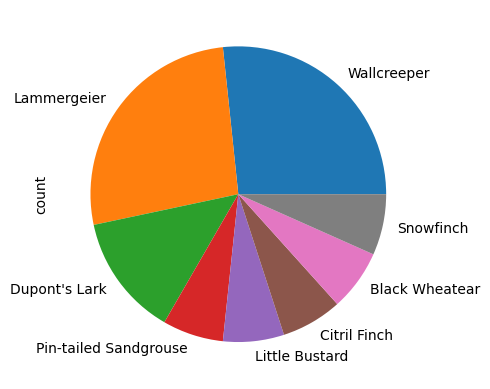

In [8]:
# the number of appearances of each bird, e.g. in a pie chart
observed_birds.value_counts().plot.pie()

Pandas Series can contain a variety of python data types, such as strings, integers, time stamps, and of course also floats. As an example, we'll draw N=10000 Gaussian random numbers and plot a histogram for them. Note that by loading pandas, we already loaded matplotlib.pyplot into namespace plt.

0       1.860114
1       3.743914
2       2.259776
3       2.140391
4       1.275885
          ...   
9995    2.531846
9996    2.123446
9997    1.921412
9998    3.287471
9999    1.763579
Length: 10000, dtype: float64

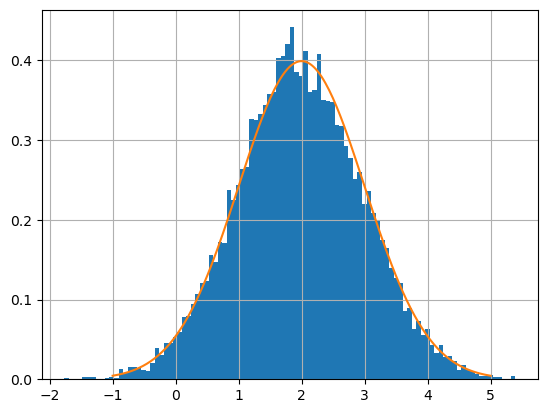

In [9]:
# you can also gererate a Pandas Series of floats...
N=10000
sigma = 1
mu = 2
random_numbers_array = np.random.normal(mu, sigma, N) # N gaussian random numbers i  a numpy array
random_numbers = pd.Series(random_numbers_array)  # convert to Series
# ... and plot the NORMALIZED histogram in one line
ax = random_numbers.hist(density=True, 
                        bins =100)
# add the analytic formula of the gaussian 
x = np.linspace(-1, 5, 200)
ax.plot(x, np.exp(-(x-mu)**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma))

## and back to numpy :
# random_numbers.to_numpy()

random_numbers

# TASK I: <a class="anchor" id="task1"></a>
Label x and y axis, change the color of the bars and the line, and give the plot a title.

In the following you see that simple numpy operations can directly be applied on Pandas Series (i.e. on columns of Data Frames). The output is again a pandas Series. 

Further, you'll see that you can print some basic statistics of pandas Series using pandas function *describe*

count    10000.000000
mean         1.991966
std          0.960554
min          0.000083
25%          1.306360
50%          1.957022
75%          2.644161
max          5.393326
dtype: float64

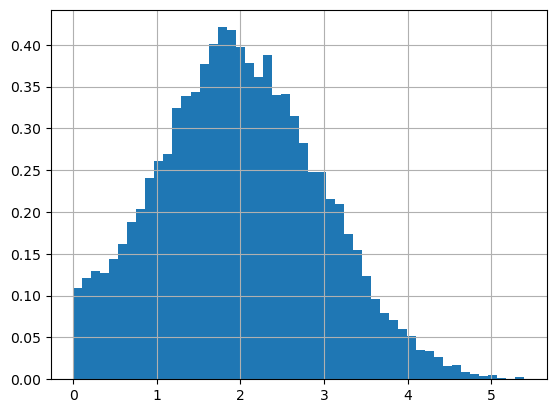

In [10]:
# take the absolute value of each item in the Pandas series 
# and plot a histogram of the result
ax = abs(random_numbers).hist(bins=50, density=True)

# print some basic statistics of a Pandas series
abs(random_numbers).describe()

In [11]:
#### Solution

## 4. Pandas DataFrames <a class="anchor" id="4"></a>
You find the full documentation here: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html.

### 4.1. Generating  and accessing Pandas DataFrames <a class="anchor" id="4.1"></a>
.. and some manipulations.

At first we see how to generate an empty data frame and fill it column by column. We see what's an index and what's a column. Then, we generate a data frame from a dictionary.

In [12]:
# There are plenty of different ways to create a DataFrame. 

# An empty DataFrame can be created by
df = pd.DataFrame()  
df

""


In [13]:
# This empty DataFrame can be filled columnwise with lists:

# e.g.: add new column with name "Country" to data frame df
df["Country"]  = ["UK", "France", "Spain"]
df["Capital"] = ["London", "Paris", "Madrid"]
df["Inhabitants Country in Mio"] = [67.22, 67.39, 47.35]
df

,Country,Capital,Inhabitants Country in Mio
0,UK,London,67.22
1,France,Paris,67.39
2,Spain,Madrid,47.35


In [14]:
# it makes sense to give column names without spaces, so you can do:
df.Capital  # this returns a pandas Series with name Capital!

0    London
1     Paris
2    Madrid
Name: Capital, dtype: object

We can also transform the above bird pandas series into a data frame. The Series name turns into the column name.

In [15]:
# data frames and pandas series are not the same thing
birds_df = pd.DataFrame(observed_birds)
# Note the column name
birds_df

,birds
0,Wallcreeper
1,Lammergeier
2,Lammergeier
3,Lammergeier
4,Dupont's Lark
5,Pin-tailed Sandgrouse
6,Lammergeier
7,Wallcreeper
8,Little Bustard
9,Dupont's Lark


In [16]:
# we can change the column name with function rename():
birds_df =birds_df.rename(columns={"birds":"bird names"}) # the same works with index
birds_df

,bird names
0,Wallcreeper
1,Lammergeier
2,Lammergeier
3,Lammergeier
4,Dupont's Lark
5,Pin-tailed Sandgrouse
6,Lammergeier
7,Wallcreeper
8,Little Bustard
9,Dupont's Lark


Back to the countries dataframe...

In [17]:
# column's names
df.columns

Index(['Country', 'Capital', 'Inhabitants Country in Mio'], dtype='object')

In [18]:
# row indexes names
df.index

RangeIndex(start=0, stop=3, step=1)

In [19]:
# You can also create a single-column DataFrame from a list (This is not a Pandas Series!)
df = pd.DataFrame( ["UK", "France", "Spain"], columns = ["Country"])  
df

,Country
0,UK
1,France
2,Spain


In [20]:
# or start from a python dictionary with lists as values (must be of same length).
country_dict = { "Country" :            ["UK",     "France", "Spain"],
                 "Capital":            ["London", "Paris", "Madrid"],
                 "Inhabitants Country in Mio": [67.22, 67.39, 47.35]}
# write DataFrame to file, but without the index
pd.DataFrame(country_dict).to_csv(data_dir + "countries.csv", index = False)
# print inline
country_df = pd.DataFrame(country_dict) # in jupyter, we just write the name of the dataFrame into the last line to show it nicely.
# in a *.py file (in a script)

country_df

,Country,Capital,Inhabitants Country in Mio
0,UK,London,67.22
1,France,Paris,67.39
2,Spain,Madrid,47.35


In [21]:
# If you pass a dictionary with scalars instead of lists, 
# you have to tell pandas how to interpret that (by adding items())
fruit_colors = {"banana": "yellow",
                "apple" : "green",
                "orange": "orange",
                "cherry": "red",
                "berry" : "black",
                "hammer": "grey"
               }
fruit_df = pd.DataFrame(fruit_colors.items(), 
                        columns=["fruit", "color"])
fruit_df

,fruit,color
0,banana,yellow
1,apple,green
2,orange,orange
3,cherry,red
4,berry,black
5,hammer,grey


In [22]:
# you might want to have fruit as the index
fruit_df = fruit_df.set_index("fruit")
fruit_df

,color
fruit,
banana,yellow
apple,green
orange,orange
cherry,red
berry,black
hammer,grey


In [23]:
# then you can access values by column + index
fruit_df.color.apple

'green'

In [24]:
# hammer is not a fruit, so we just drop it from the data frame
fruit_df = fruit_df.drop("hammer")
fruit_df

,color
fruit,
banana,yellow
apple,green
orange,orange
cherry,red
berry,black


In [25]:
# or you might regret setting "fruits" as index
fruit_df = fruit_df.reset_index()
fruit_df

,fruit,color
0,banana,yellow
1,apple,green
2,orange,orange
3,cherry,red
4,berry,black


#### Deprecated functions and handling exceptions

The pandas function **append()** cannot be called anymore because it is deprecated since version 1.4.0. Below you'll see how to use **concat()** instead. 

In [26]:
try:
    fruit_df.append({"fruit":"plum", "color":"lila"}, ignore_index=True)
except Exception as e:
     print(type(e), e)

<class 'AttributeError'> 'DataFrame' object has no attribute 'append'


We use the `try/except` block to handle exceptions.

- The `try` block lets you test a block of code for errors.
- The `except` block lets you handle the error.

In this case, we show the message of the Exception due to `append()` is deprecated

As a developer, it is also possible to `raise` exceptions.

Take a look at the Python [documentation](https://docs.python.org/3/tutorial/errors.html) for more information on this topic.



In [27]:
pd.concat([fruit_df,
           pd.DataFrame({"plum":"lila"}.items(), 
                        columns=["fruit", "color"])
          ], 
          ignore_index=True)

,fruit,color
0,banana,yellow
1,apple,green
2,orange,orange
3,cherry,red
4,berry,black
5,plum,lila


In [28]:
# remove column "color" with function pop
fruit_df.pop("color")
fruit_df

,fruit
0,banana
1,apple
2,orange
3,cherry
4,berry


NOTE that the usage of <code>pop()</code> (for removing columns) is different from that of <code>drop()</code> (for deleting rows):

    fruit_df = fruit_df.drop("hammer")
    fruit_df  
vs
    
    fruit_df.pop("color")
    fruit_df
    
For more on <code>pop()</code> see https://www.geeksforgeeks.org/python-pandas-dataframe-pop/

In [29]:
# And finally, and quite common, you can load excel sheets, csv files ( ..json, pickle, parquet..)
# use help(pd.read_csv("countries.csv") ) to know more
country_df = pd.read_csv(data_dir + "countries.csv") 
# equivalent: pd.read_excel("countries.xlsx")
country_df

,Country,Capital,Inhabitants Country in Mio
0,UK,London,67.22
1,France,Paris,67.39
2,Spain,Madrid,47.35


You can overwrite a column with a list:

In [30]:
country_df

,Country,Capital,Inhabitants Country in Mio
0,UK,London,67.22
1,France,Paris,67.39
2,Spain,Madrid,47.35


In [31]:
country_df.Capital = ["LON", "PAR", "MAD"] # you can replace complete columns like this
country_df

,Country,Capital,Inhabitants Country in Mio
0,UK,LON,67.22
1,France,PAR,67.39
2,Spain,MAD,47.35


And you can output a subdataframe, consisting of several columns with their entries.

In [32]:
country_df[["Country","Capital"]] # returns a DataFrame, note the flipped order of columns

,Country,Capital
0,UK,LON
1,France,PAR
2,Spain,MAD


# TASK II: <a class="anchor" id="task2"></a>

Add another country with its capital and number of inhabitants to the table. 

In [33]:
#### solution

### 4.2. Operations on DataFrames <a class="anchor" id="4.2"></a>

#### 4.2.1. Selecting data <a class="anchor" id="4.2.1"></a>

We start from this dataset from Kaggle with data from IMDB https://www.kaggle.com/datasets/omarhanyy/imdb-top-1000/discussion/393097


In [34]:
df_imdb = pd.read_csv(data_dir+"imdb/imdb_top_1000.csv")

You already know how to access columns and rows: 

In [35]:
df_imdb.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [36]:
df_imdb["Series_Title"] # returns a Series

0      The Shawshank Redemption
1                 The Godfather
2               The Dark Knight
3        The Godfather: Part II
4                  12 Angry Men
                 ...           
995      Breakfast at Tiffany's
996                       Giant
997       From Here to Eternity
998                    Lifeboat
999                The 39 Steps
Name: Series_Title, Length: 1000, dtype: object

In [37]:
df_imdb.Series_Title # same thing; therefore: try to avoid using spaces in your column names

0      The Shawshank Redemption
1                 The Godfather
2               The Dark Knight
3        The Godfather: Part II
4                  12 Angry Men
                 ...           
995      Breakfast at Tiffany's
996                       Giant
997       From Here to Eternity
998                    Lifeboat
999                The 39 Steps
Name: Series_Title, Length: 1000, dtype: object

#### 4.2.2. Slicing data frames <a class="anchor" id="4.2.2"></a>
Slicing means to output one or several columns or rows. 
Slices can be either accessed by label with loc or by index with iloc.

In [38]:
# original data frame at this point, before slicing: 
df_imdb.head(3)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


#### 4.2.2.1. Slicing by label with **loc** <a class="anchor" id="4.2.2.1"></a>
To change individual fields of the dataframe you need to use loc (by label) or iloc (by position).
With indexing, your output is the value of the field.

In [39]:
# syntax: df.loc[row_indexer,column_indexer]
df_imdb.loc[2, "Series_Title"] # the output is the column value of the row with index 2 and column Series_Title 

'The Dark Knight'

Note that in the above example, 2 means the label and not the position of the respective row!

In [40]:
df_imdb.loc[2] # the output is the row with index 2 as pandas series

Poster_Link      https://m.media-amazon.com/images/M/MV5BMTMxNT...
Series_Title                                       The Dark Knight
Released_Year                                                 2008
Certificate                                                     UA
Runtime                                                    152 min
Genre                                         Action, Crime, Drama
IMDB_Rating                                                    9.0
Overview         When the menace known as the Joker wreaks havo...
Meta_score                                                    84.0
Director                                         Christopher Nolan
Star1                                               Christian Bale
Star2                                                 Heath Ledger
Star3                                                Aaron Eckhart
Star4                                                Michael Caine
No_of_Votes                                                230

In [41]:
df_imdb.loc[:, "Series_Title"] # the output is the column Series_Title as pandas series

0      The Shawshank Redemption
1                 The Godfather
2               The Dark Knight
3        The Godfather: Part II
4                  12 Angry Men
                 ...           
995      Breakfast at Tiffany's
996                       Giant
997       From Here to Eternity
998                    Lifeboat
999                The 39 Steps
Name: Series_Title, Length: 1000, dtype: object

#### 4.2.2.2.  Slicing by position with **iloc** <a class="anchor" id="4.2.2.2"></a>

In [42]:
df_imdb.iloc[1, 2] # the output is the column value of the row with position 1 
                   # (note that python always counts from 0) and column with position 2

'1972'

In [43]:
df_imdb.iloc[1, 1: 5] # 

Series_Title     The Godfather
Released_Year             1972
Certificate                  A
Runtime                175 min
Name: 1, dtype: object

### 4.2.3. Filtering <a class="anchor" id="4.2.3"></a>

Pandas DataFrames (and Series) can be filtered by using **boolean expressions**.

In [44]:
df_imdb[df_imdb["Director"]=="Francis Ford Coppola"] # use Boolean expressions for picking a row/ several rows

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
74,https://m.media-amazon.com/images/M/MV5BMDdhOD...,Apocalypse Now,1979,R,147 min,"Drama, Mystery, War",8.4,A U.S. Army officer serving in Vietnam is task...,94.0,Francis Ford Coppola,Martin Sheen,Marlon Brando,Robert Duvall,Frederic Forrest,606398,"83,471,511"
693,https://m.media-amazon.com/images/M/MV5BNzZlMT...,The Conversation,1974,U,113 min,"Drama, Mystery, Thriller",7.8,"A paranoid, secretive surveillance expert has ...",85.0,Francis Ford Coppola,Gene Hackman,John Cazale,Allen Garfield,Frederic Forrest,98611,"4,420,000"
974,https://m.media-amazon.com/images/M/MV5BNWFlYW...,The Godfather: Part III,1990,A,162 min,"Crime, Drama",7.6,"Follows Michael Corleone, now in his 60s, as h...",60.0,Francis Ford Coppola,Al Pacino,Diane Keaton,Andy Garcia,Talia Shire,359809,"66,666,062"


In [45]:
df_imdb[df_imdb["Director"]=="Francis Ford Coppola"].Star1

1      Marlon Brando
3          Al Pacino
74      Martin Sheen
693     Gene Hackman
974        Al Pacino
Name: Star1, dtype: object

Lets show the series and films premired in 2020 onwards

In [46]:
try:
    df_imdb[df_imdb["Released_Year"] > 2020] # Another boolean expression
except Exception as e:
     print(type(e), e)

<class 'TypeError'> '>' not supported between instances of 'str' and 'int'


The series in column Released_Year is not a integer, let's convert to int

In [47]:
try:
    df_imdb["Released_Year"] = df_imdb["Released_Year"].astype(int) 
except Exception as e:
     print(type(e), e)


<class 'ValueError'> invalid literal for int() with base 10: 'PG'


It's not possible to convert it to int(). This error is caused because we try to convert an string to int instead to a float. So let's convert to int and then to float.
We will use the function **apply()** https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html

In [48]:
# Function we apply to the series
def toInt(x, ):
    try:
        x = int(float(x)) # from string to float to int
    except:
        x = np.NaN
    return x

In [49]:
df_imdb['Released_Year'] = df_imdb['Released_Year'].apply(toInt)


In [50]:
df_imdb[df_imdb["Released_Year"] >= 2020]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
18,https://m.media-amazon.com/images/M/MV5BNjViNW...,Hamilton,2020.0,PG-13,160 min,"Biography, Drama, History",8.6,The real life of one of America's foremost fou...,90.0,Thomas Kail,Lin-Manuel Miranda,Phillipa Soo,Leslie Odom Jr.,Renée Elise Goldsberry,55291,NaN
20,https://m.media-amazon.com/images/M/MV5BOTc2ZT...,Soorarai Pottru,2020.0,U,153 min,Drama,8.6,"Nedumaaran Rajangam ""Maara"" sets out to make t...",NaN,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,NaN
205,https://m.media-amazon.com/images/M/MV5BZGE1MD...,Soul,2020.0,U,100 min,"Animation, Adventure, Comedy",8.1,"After landing the gig of a lifetime, a New Yor...",83.0,Pete Docter,Kemp Powers,Jamie Foxx,Tina Fey,Graham Norton,159171,NaN
464,https://m.media-amazon.com/images/M/MV5BNmI0MT...,Dil Bechara,2020.0,UA,101 min,"Comedy, Drama, Romance",7.9,The emotional journey of two hopelessly in lov...,NaN,Mukesh Chhabra,Sushant Singh Rajput,Sanjana Sanghi,Sahil Vaid,Saswata Chatterjee,111478,NaN
612,https://m.media-amazon.com/images/M/MV5BYjYzOG...,The Trial of the Chicago 7,2020.0,R,129 min,"Drama, History, Thriller",7.8,The story of 7 people on trial stemming from v...,77.0,Aaron Sorkin,Eddie Redmayne,Alex Sharp,Sacha Baron Cohen,Jeremy Strong,89896,NaN
613,https://m.media-amazon.com/images/M/MV5BOTNjM2...,Druk,2020.0,NaN,117 min,"Comedy, Drama",7.8,"Four friends, all high school teachers, test a...",81.0,Thomas Vinterberg,Mads Mikkelsen,Thomas Bo Larsen,Magnus Millang,Lars Ranthe,33931,NaN


### 4.2.4. Transposing, Sorting, and Grouping <a class="anchor" id="4.2.4"></a>

You might have noticed that it's so easy and quick to work with columns and rather cumbersome and slow to work with rows. You can switch roles by transposing the table.

In [51]:
df_imdb.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Poster_Link,https://m.media-amazon.com/images/M/MV5BMDFkYT...,https://m.media-amazon.com/images/M/MV5BM2MyNj...,https://m.media-amazon.com/images/M/MV5BMTMxNT...,https://m.media-amazon.com/images/M/MV5BMWMwMG...,https://m.media-amazon.com/images/M/MV5BMWU4N2...,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,https://m.media-amazon.com/images/M/MV5BNGNhMD...,https://m.media-amazon.com/images/M/MV5BNDE4OT...,https://m.media-amazon.com/images/M/MV5BMjAxMz...,https://m.media-amazon.com/images/M/MV5BMmEzNT...,...,https://m.media-amazon.com/images/M/MV5BYjRmY2...,https://m.media-amazon.com/images/M/MV5BMzAyND...,https://m.media-amazon.com/images/M/MV5BMjAwMT...,https://m.media-amazon.com/images/M/MV5BYTE4YW...,https://m.media-amazon.com/images/M/MV5BZjQyMG...,https://m.media-amazon.com/images/M/MV5BNGEwMT...,https://m.media-amazon.com/images/M/MV5BODk3Yj...,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,https://m.media-amazon.com/images/M/MV5BZTBmMj...,https://m.media-amazon.com/images/M/MV5BMTY5OD...
Series_Title,The Shawshank Redemption,The Godfather,The Dark Knight,The Godfather: Part II,12 Angry Men,The Lord of the Rings: The Return of the King,Pulp Fiction,Schindler's List,Inception,Fight Club,...,Giù la testa,Kelly's Heroes,The Jungle Book,Blowup,A Hard Day's Night,Breakfast at Tiffany's,Giant,From Here to Eternity,Lifeboat,The 39 Steps
Released_Year,1994.0,1972.0,2008.0,1974.0,1957.0,2003.0,1994.0,1993.0,2010.0,1999.0,...,1971.0,1970.0,1967.0,1966.0,1964.0,1961.0,1956.0,1953.0,1944.0,1935.0
Certificate,A,A,UA,A,U,U,A,A,UA,A,...,PG,GP,U,A,U,A,G,Passed,NaN,NaN
Runtime,142 min,175 min,152 min,202 min,96 min,201 min,154 min,195 min,148 min,139 min,...,157 min,144 min,78 min,111 min,87 min,115 min,201 min,118 min,97 min,86 min
Genre,Drama,"Crime, Drama","Action, Crime, Drama","Crime, Drama","Crime, Drama","Action, Adventure, Drama","Crime, Drama","Biography, Drama, History","Action, Adventure, Sci-Fi",Drama,...,"Drama, War, Western","Adventure, Comedy, War","Animation, Adventure, Family","Drama, Mystery, Thriller","Comedy, Music, Musical","Comedy, Drama, Romance","Drama, Western","Drama, Romance, War","Drama, War","Crime, Mystery, Thriller"
IMDB_Rating,9.3,9.2,9.0,9.0,9.0,8.9,8.9,8.9,8.8,8.8,...,7.6,7.6,7.6,7.6,7.6,7.6,7.6,7.6,7.6,7.6
Overview,Two imprisoned men bond over a number of years...,An organized crime dynasty's aging patriarch t...,When the menace known as the Joker wreaks havo...,The early life and career of Vito Corleone in ...,A jury holdout attempts to prevent a miscarria...,Gandalf and Aragorn lead the World of Men agai...,"The lives of two mob hitmen, a boxer, a gangst...","In German-occupied Poland during World War II,...",A thief who steals corporate secrets through t...,An insomniac office worker and a devil-may-car...,...,A low-life bandit and an I.R.A. explosives exp...,A group of U.S. soldiers sneaks across enemy l...,Bagheera the Panther and Baloo the Bear have a...,A fashion photographer unknowingly captures a ...,"Over two ""typical"" days in the life of The Bea...",A young New York socialite becomes interested ...,Sprawling epic covering the life of a Texas ca...,"In Hawaii in 1941, a private is cruelly punish...",Several survivors of a torpedoed merchant ship...,A man in London tries to help a counter-espion...
Meta_score,80.0,100.0,84.0,90.0,96.0,94.0,94.0,94.0,74.0,66.0,...,77.0,50.0,65.0,82.0,96.0,76.0,84.0,85.0,78.0,93.0
Director,Frank Darabont,Francis Ford Coppola,Christopher Nolan,Francis Ford Coppola,Sidney Lumet,Peter Jackson,Quentin Tarantino,Steven Spielberg,Christopher Nolan,David Fincher,...,Sergio Leone,Brian G. Hutton,Wolfgang Reitherman,Michelangelo Antonioni,Richard Lester,Blake Edwards,George Stevens,Fred Zinnemann,Alfred Hitchcock,Alfred Hitchcock


You can sort an index alphabetically...

In [52]:
df_imdb.T.sort_index(axis=0, ascending=True) # try also: ascending = False

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Certificate,A,A,UA,A,U,U,A,A,UA,A,...,PG,GP,U,A,U,A,G,Passed,NaN,NaN
Director,Frank Darabont,Francis Ford Coppola,Christopher Nolan,Francis Ford Coppola,Sidney Lumet,Peter Jackson,Quentin Tarantino,Steven Spielberg,Christopher Nolan,David Fincher,...,Sergio Leone,Brian G. Hutton,Wolfgang Reitherman,Michelangelo Antonioni,Richard Lester,Blake Edwards,George Stevens,Fred Zinnemann,Alfred Hitchcock,Alfred Hitchcock
Genre,Drama,"Crime, Drama","Action, Crime, Drama","Crime, Drama","Crime, Drama","Action, Adventure, Drama","Crime, Drama","Biography, Drama, History","Action, Adventure, Sci-Fi",Drama,...,"Drama, War, Western","Adventure, Comedy, War","Animation, Adventure, Family","Drama, Mystery, Thriller","Comedy, Music, Musical","Comedy, Drama, Romance","Drama, Western","Drama, Romance, War","Drama, War","Crime, Mystery, Thriller"
Gross,"28,341,469","134,966,411","534,858,444","57,300,000","4,360,000","377,845,905","107,928,762","96,898,818","292,576,195","37,030,102",...,"696,690","1,378,435","141,843,612",NaN,"13,780,024",NaN,NaN,"30,500,000",NaN,NaN
IMDB_Rating,9.3,9.2,9.0,9.0,9.0,8.9,8.9,8.9,8.8,8.8,...,7.6,7.6,7.6,7.6,7.6,7.6,7.6,7.6,7.6,7.6
Meta_score,80.0,100.0,84.0,90.0,96.0,94.0,94.0,94.0,74.0,66.0,...,77.0,50.0,65.0,82.0,96.0,76.0,84.0,85.0,78.0,93.0
No_of_Votes,2343110,1620367,2303232,1129952,689845,1642758,1826188,1213505,2067042,1854740,...,30144,45338,166409,56513,40351,166544,34075,43374,26471,51853
Overview,Two imprisoned men bond over a number of years...,An organized crime dynasty's aging patriarch t...,When the menace known as the Joker wreaks havo...,The early life and career of Vito Corleone in ...,A jury holdout attempts to prevent a miscarria...,Gandalf and Aragorn lead the World of Men agai...,"The lives of two mob hitmen, a boxer, a gangst...","In German-occupied Poland during World War II,...",A thief who steals corporate secrets through t...,An insomniac office worker and a devil-may-car...,...,A low-life bandit and an I.R.A. explosives exp...,A group of U.S. soldiers sneaks across enemy l...,Bagheera the Panther and Baloo the Bear have a...,A fashion photographer unknowingly captures a ...,"Over two ""typical"" days in the life of The Bea...",A young New York socialite becomes interested ...,Sprawling epic covering the life of a Texas ca...,"In Hawaii in 1941, a private is cruelly punish...",Several survivors of a torpedoed merchant ship...,A man in London tries to help a counter-espion...
Poster_Link,https://m.media-amazon.com/images/M/MV5BMDFkYT...,https://m.media-amazon.com/images/M/MV5BM2MyNj...,https://m.media-amazon.com/images/M/MV5BMTMxNT...,https://m.media-amazon.com/images/M/MV5BMWMwMG...,https://m.media-amazon.com/images/M/MV5BMWU4N2...,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,https://m.media-amazon.com/images/M/MV5BNGNhMD...,https://m.media-amazon.com/images/M/MV5BNDE4OT...,https://m.media-amazon.com/images/M/MV5BMjAxMz...,https://m.media-amazon.com/images/M/MV5BMmEzNT...,...,https://m.media-amazon.com/images/M/MV5BYjRmY2...,https://m.media-amazon.com/images/M/MV5BMzAyND...,https://m.media-amazon.com/images/M/MV5BMjAwMT...,https://m.media-amazon.com/images/M/MV5BYTE4YW...,https://m.media-amazon.com/images/M/MV5BZjQyMG...,https://m.media-amazon.com/images/M/MV5BNGEwMT...,https://m.media-amazon.com/images/M/MV5BODk3Yj...,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,https://m.media-amazon.com/images/M/MV5BZTBmMj...,https://m.media-amazon.com/images/M/MV5BMTY5OD...
Released_Year,1994.0,1972.0,2008.0,1974.0,1957.0,2003.0,1994.0,1993.0,2010.0,1999.0,...,1971.0,1970.0,1967.0,1966.0,1964.0,1961.0,1956.0,1953.0,1944.0,1935.0


... or sort rows by the values of a column, eg. countries by their number of inhabitants:

In [53]:
df_imdb.sort_values(by="Released_Year", ascending=True)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
321,https://m.media-amazon.com/images/M/MV5BNWJiNG...,Das Cabinet des Dr. Caligari,1920.0,NaN,76 min,"Fantasy, Horror, Mystery",8.1,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",NaN,Robert Wiene,Werner Krauss,Conrad Veidt,Friedrich Feher,Lil Dagover,57428,NaN
127,https://m.media-amazon.com/images/M/MV5BZjhhMT...,The Kid,1921.0,Passed,68 min,"Comedy, Drama, Family",8.3,"The Tramp cares for an abandoned child, but ev...",NaN,Charles Chaplin,Charles Chaplin,Edna Purviance,Jackie Coogan,Carl Miller,113314,"5,450,000"
568,https://m.media-amazon.com/images/M/MV5BMTAxYj...,Nosferatu,1922.0,NaN,94 min,"Fantasy, Horror",7.9,Vampire Count Orlok expresses interest in a ne...,NaN,F.W. Murnau,Max Schreck,Alexander Granach,Gustav von Wangenheim,Greta Schröder,88794,NaN
194,https://m.media-amazon.com/images/M/MV5BZWFhOG...,Sherlock Jr.,1924.0,Passed,45 min,"Action, Comedy, Romance",8.2,"A film projectionist longs to be a detective, ...",NaN,Buster Keaton,Buster Keaton,Kathryn McGuire,Joe Keaton,Erwin Connelly,41985,"977,375"
193,https://m.media-amazon.com/images/M/MV5BZjEyOT...,The Gold Rush,1925.0,Passed,95 min,"Adventure, Comedy, Drama",8.2,A prospector goes to the Klondike in search of...,NaN,Charles Chaplin,Charles Chaplin,Mack Swain,Tom Murray,Henry Bergman,101053,"5,450,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,https://m.media-amazon.com/images/M/MV5BOTNjM2...,Druk,2020.0,NaN,117 min,"Comedy, Drama",7.8,"Four friends, all high school teachers, test a...",81.0,Thomas Vinterberg,Mads Mikkelsen,Thomas Bo Larsen,Magnus Millang,Lars Ranthe,33931,NaN
205,https://m.media-amazon.com/images/M/MV5BZGE1MD...,Soul,2020.0,U,100 min,"Animation, Adventure, Comedy",8.1,"After landing the gig of a lifetime, a New Yor...",83.0,Pete Docter,Kemp Powers,Jamie Foxx,Tina Fey,Graham Norton,159171,NaN
612,https://m.media-amazon.com/images/M/MV5BYjYzOG...,The Trial of the Chicago 7,2020.0,R,129 min,"Drama, History, Thriller",7.8,The story of 7 people on trial stemming from v...,77.0,Aaron Sorkin,Eddie Redmayne,Alex Sharp,Sacha Baron Cohen,Jeremy Strong,89896,NaN
20,https://m.media-amazon.com/images/M/MV5BOTc2ZT...,Soorarai Pottru,2020.0,U,153 min,Drama,8.6,"Nedumaaran Rajangam ""Maara"" sets out to make t...",NaN,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,NaN


To show how to **group**, we will groub by director and count how many series has been included in the list

In [54]:
df_imdb[["Director", "Series_Title"]].groupby('Director').count()

,Series_Title
Director,
Aamir Khan,1
Aaron Sorkin,1
Abdellatif Kechiche,1
Abhishek Chaubey,1
Abhishek Kapoor,1
...,...
Zack Snyder,2
Zaza Urushadze,1
Zoya Akhtar,2


Now we check which directors have more than 10 productions in the list and we group by Star1 (the main character) to see which are the characters

In [55]:
s = df_imdb[["Director", "Series_Title"]].groupby('Director').count()
s[s.Series_Title > 10].index.tolist()

['Alfred Hitchcock', 'Hayao Miyazaki', 'Steven Spielberg']

In [56]:
df_imdb[df_imdb["Director"] == s[s.Series_Title > 10].index.tolist()[0]][["Director", "Star1"]].groupby('Star1').count()

,Director
Star1,
Anthony Perkins,1
Cary Grant,2
Farley Granger,1
James Stewart,3
Laurence Olivier,1
Margaret Lockwood,1
Ray Milland,1
Robert Donat,1
Rod Taylor,1


# TASK III: <a class="anchor" id="task3"></a>

1. Add one of your favorite films or series to this dataset, including the actual data from IMDB.
2. Calculate the average IMDB rating for all the films directed by the same director and save the result in a new column.

You might want to crate a copy of the current data frame, so you don't have to rerun the notebook over and over again.

In [57]:
df_imdb_copy = df_imdb.copy()

In [58]:
#### solution

## 5. Profiling <a class="anchor" id="5"></a>

`ydata-profiling` is a leading package for data profiling, that automates and standardizes the generation of detailed reports, complete with statistics and visualizations. It supports Pandas and Spark Dataframes, databases and data storages, and offers features such as data catalog, PII management, and time-series analysis.

Install [ydata-profiling](https://github.com/ydataai/ydata-profiling#ydata-profiling)


In [ ]:
from ydata_profiling import ProfileReport


In [ ]:
profile = ProfileReport(df_imdb, title="Profiling Report")
profile

## 6. Remarks <a class="anchor" id="6"></a>

1. Use tab completion in pandas: start to write df.pl and fill by pressing TAB to complete, e.g. to df.plot()
2. Depending on what we find in the databases that you chose, we might have to deal with Missing Data https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data